# Unsupervised Learning
- 레이블이 주어지지 않았을때 군집화(clustering) 하기
- 유사성이 높은 데이터들을 동일한 그룹으로 분류
- 확률을 주는 것이 아니라 군집화(분류)를 해주는 것
- 종류
    - k-means : centroid 기반
    - mean shift : centroid 기반
    - Gaussian Mixture Model : 데이터 정규분포 기반
    - DBSCAN : 데이터 밀도 기반

# K-Means Clustering
    - 중심점을 잡는다
    - 처음 그룹화 한 후, 그룹 안에 중심점으로 centroid를 이동
    - 새로운 데이터가 어디의 그룹에 가까운지 확인하고 가까운 그룹으로 편입
    - 다시 그룹 안의 중심점으로 centroid를 이동
    - 이런 방법으로 계속 그룹화,중심점 이동을 반복
    - 중심점을 이동했지만 데이터들의 중심점 소속 변경이 없으면 군집화 완료
    - 시간이 오래 걸리고 이상치 데이터에 취약하다

- k-means : 몇개로 나눠줄껀지
- centroid : 가운데 값, centroid를 이동시키면서 가장 잘 나눌 수 있는지 이동한다

### sklearn.cluster.KMeans
- class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
- parameters
    - n_clusters : 몇개의 군집 중심점을 구할지
    - init = 'k-means++','random' : 초기에 군집 중심점의 좌표를 설정할 방식
    - max_iter : 최대 반복 횟수(centroid의 이동 횟수), 이전의 모든 데이터의 중심점 이동이 없으면 종료
- attribute
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표 ,shape [군집 개수, 피쳐 개수] ---> 피쳐를 줄이는 방법에 사용(차원 축소)

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')


iris=load_iris()

irisDF = pd.DataFrame(data= iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

print(irisDF.shape)
irisDF.head(3)

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
Kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)

Kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
print(Kmeans.labels_)
irisDF['cluster']= Kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
irisDF['target']= iris.target

iris_result =irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [8]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_transformed =pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']= pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


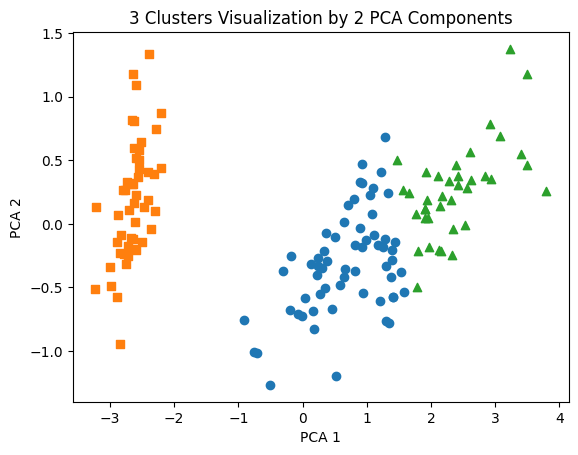

In [9]:
marker0_ind =irisDF[irisDF['cluster']==0].index
marker1_ind =irisDF[irisDF['cluster']==1].index
marker2_ind =irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### sklearn.datasets.make_blobs
- sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
- parameters
    - n_sample : 생성할 데이터
    - n_features : 데이터의 피쳐 개수
    - centers : 군집 개수
    - cluster_sted :데이터 표준편차
- returns
    - X 
    - y
    - centers

### 군집 평가

- 실루엣 분석
    - b(i) : 외부간 거리의 평균
    - a(i) : 내부간 거리의 평균
    - s(i) =  (b(i)-a(i)) / (max(a(i),b(i)))
        - 실루엣 계수 s(i)는 [-1,1]사이의 값을 가지고
        - 1에 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것
        - 0에 가까워질수록 근처의 군집과 가깝다는 것을 의미
        - 실루엣 계수가 -값이라면 해당 데이터의 군집화가 잘못 되어있다는 뜻
        - 개별 군집의 평균값의 편차가 크지 않아야 하고, 1에 가까울 수록 좋습니다


### sklearn.metrics.silhouette_samples
- klearn.metrics.silhouette_samples(X, labels, *, metric='euclidean', **kwds)
- parameters
    - X : 개별데이터 
    - labels : 군집
    - metrics = '거리 계산법'
- returns
    - silhouette

### sklearn.metrics.silhouette_score
- sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
- parameters
    - X : 개별데이터 
    - labels : 군집
    - metrics = '거리 계산법'
- returns
    - silhouette의 평균값 !!!


In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')


iris=load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

irisDF['cluster']= kmeans.labels_
print(irisDF.shape)
irisDF.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
score_samples= silhouette_samples(iris.data, irisDF['cluster'])
#print('silhouette_samples() return 값의 shape', score_samples.shpae)

irisDF['silhouette_coeff']= score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('불꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(15)

불꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [8]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<Axes: >

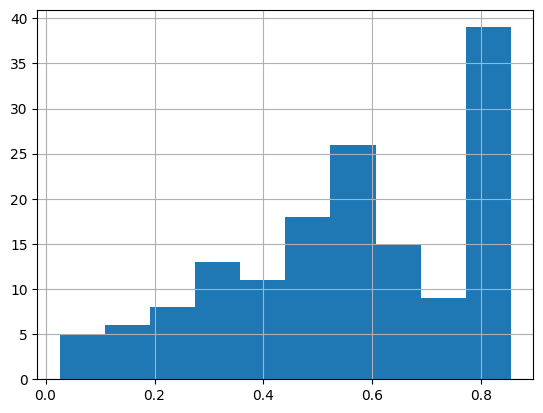

In [9]:
irisDF['silhouette_coeff'].hist()

In [10]:
### 여러개의 클러스트링 개수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


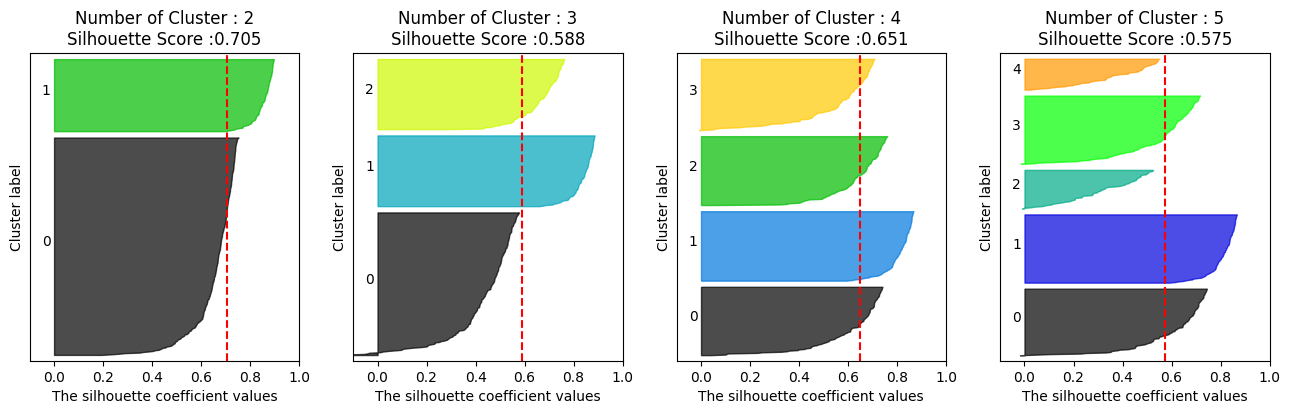

In [11]:
# 클러스터 수 변화시키면서 random 데이터 실루엣 계수 분포 시각화

# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

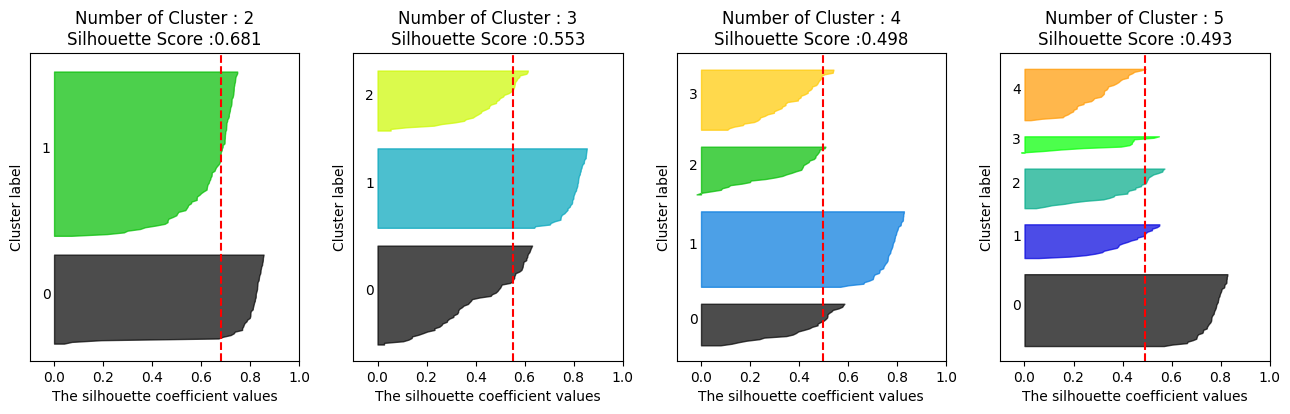

In [12]:
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

## Mean Shift 군집화
- 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함
- band-width(대역 폭)가 줄어들면 데이터의 그룹화 개수가 많아진다

## sklearn.cluster.MeanShift
- class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
- parameters
    - bandwidth : 대역 폭을 얼마나 할지
    - max_iter :  최대 반복 횟수

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y= make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels= meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [15]:
meanshift=MeanShift(bandwidth=1)
cluster_labels= meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [16]:
from sklearn.cluster import estimate_bandwidth
bandwidth= estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [17]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

best_bandwidth= estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster_labels 유형:',np.unique(cluster_labels))

cluster_labels 유형: [0 1 2]


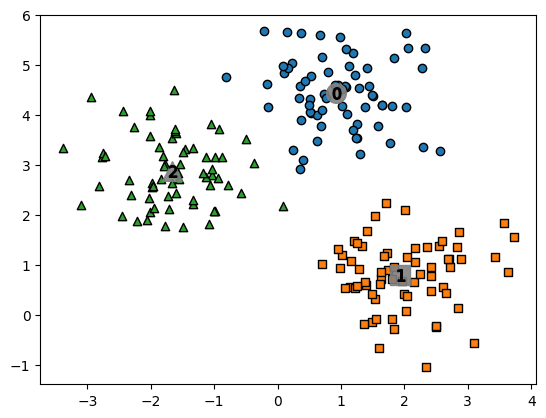

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [18]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    # 군집별 중심 표현
    plt.scatter(x = center_x_y[0], y=center_x_y[1], s= 200, color = 'gray', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y=center_x_y[1], s= 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
plt.show()
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

## GMM
- 거리 밀도 함수로 클러스트링하는 방법
- 내가 원하고자 하는 그룹의 개수를 정할 수 있다
- 가우시안 분포의 크기가 데이터의 분포에 따라 달라진다
- 데이터의 분포를 보고 가우시안 정규분포의 크기가 조절된다
- 최대 우도를 가지고 평균과 분산을 구함
- 거리의 개념으로 구하기 애매한 데이터 분포에서는 K-Means보다 Mean Shift나 GMM으로 클러스트링한다

## DBSCAN (밀도 기반 클러스터링)
- model = DBSCAN(eps=0.3,min_samples=6)
    - eps: 반경
    - min_samples: 반경안에 최소 몇개의 sample들이 들어올지

In [20]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)


In [21]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]

In [22]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

In [23]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

<Figure size 600x600 with 0 Axes>

In [25]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0         1  49   0
1         6   0  44
2        15   0  35
